In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [240]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Final_Toronto_Dataset.csv", parse_dates=['Date'], index_col='Date')

In [241]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,...,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,11771945.00,34801.00000,3144.000000,...,5.3,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0,7.25,7.11
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,11789226.50,37662.09142,2596.931225,...,6.4,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0,7.25,7.11
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,11806462.06,39796.62476,2862.309003,...,6.3,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0,6.75,5.25
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,11827345.00,41662.00000,3997.000000,...,6.2,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0,6.50,4.86
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,11849356.01,42969.07156,5936.427697,...,6.1,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0,6.25,5.44


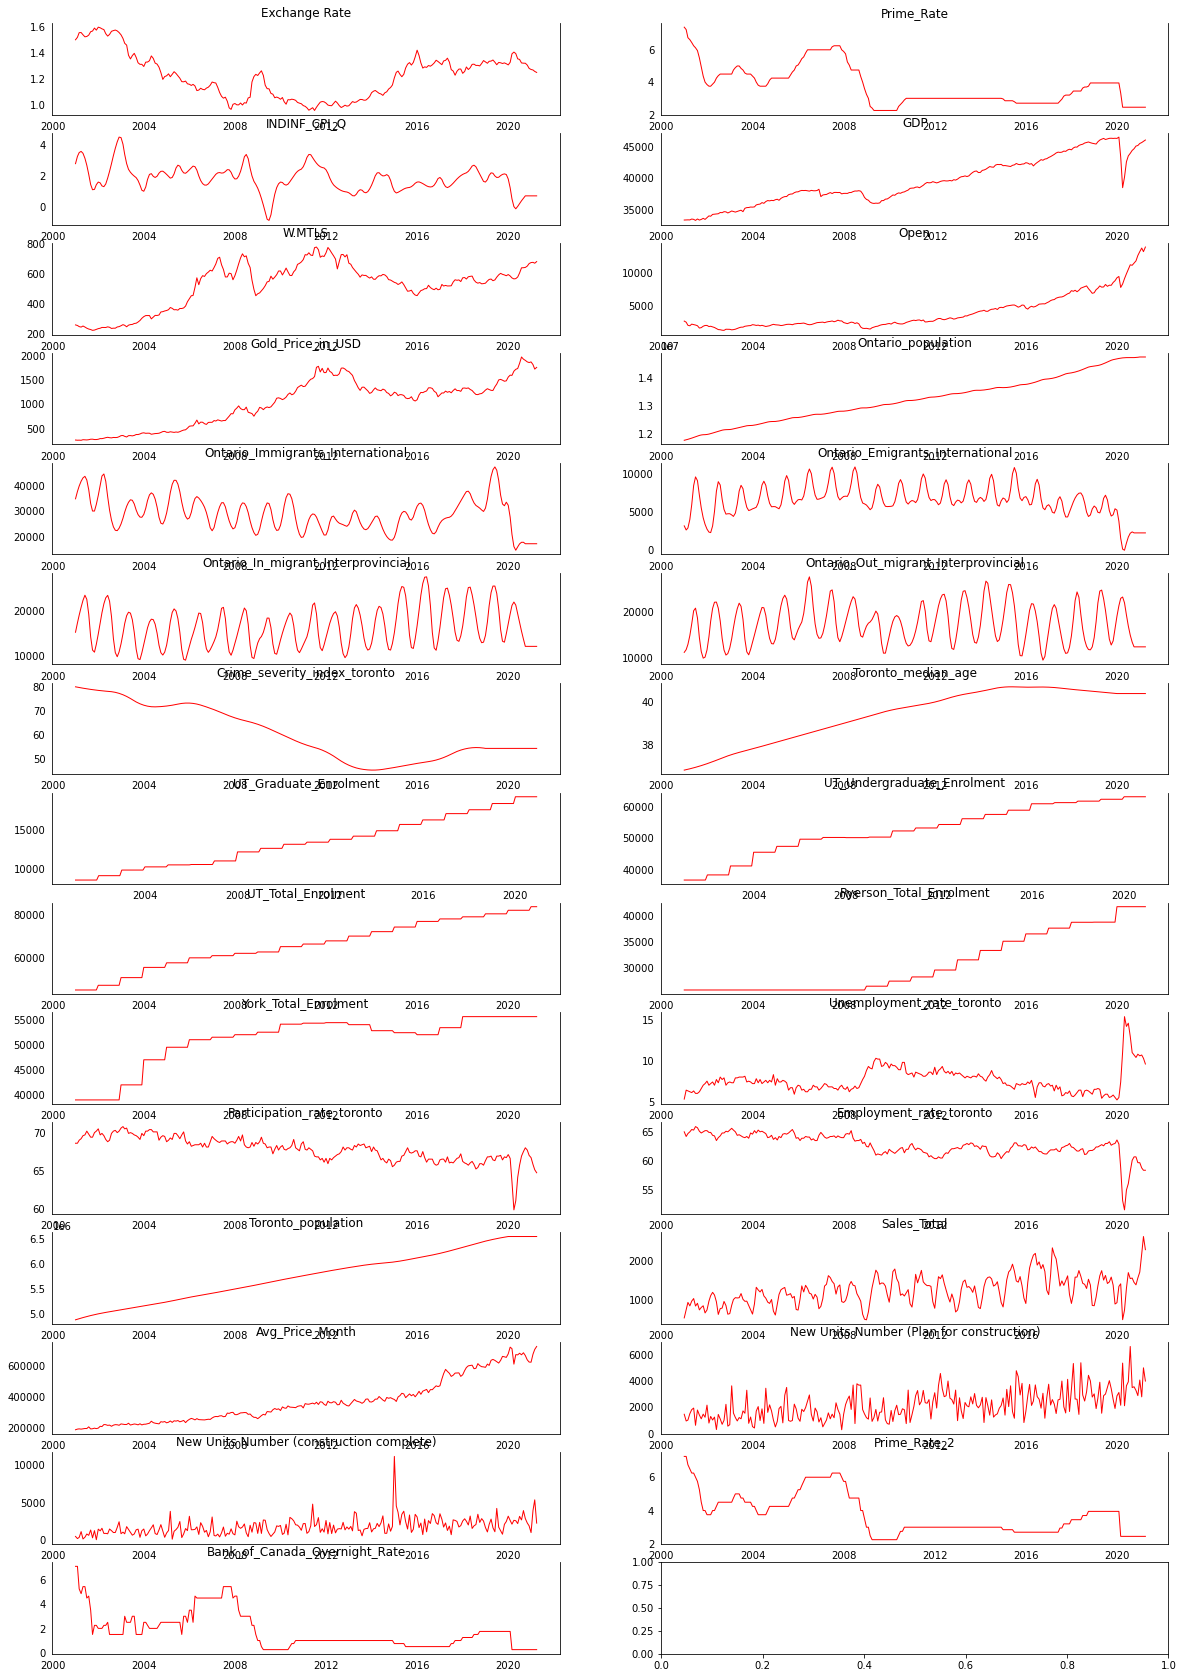

In [242]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [243]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [244]:
df = df[['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)']]

In [245]:
df.dropna(inplace=True)

In [246]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261.0,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261.0,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261.0,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261.0,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261.0,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,1.281517,2.450,0.700000,45143.29965,669.8060,12605.309530,1852.895217,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311.0,67.0,59.7,6555205.000,1551.0,625828.1154,2876.0,1903.0
2021-01-01,1.273017,2.450,0.700000,45461.59117,676.4900,13195.814200,1865.722381,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,83970.0,66.7,59.7,6555205.000,1703.0,624885.6230,4063.0,1018.0
2021-02-01,1.269159,2.450,0.700000,45606.79326,678.0100,13733.605730,1810.338000,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,83970.0,65.8,58.8,6555205.000,2167.0,676837.4998,2783.0,3929.0


In [247]:
df["Date"] = df.index
df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
df["Month"] = df["Month"].astype("float64")
df.drop(columns=["Date"], inplace=True)

In [248]:
df.columns

Index(['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

In [249]:
df.drop(columns=["Exchange Rate", "Gold_Price_in_USD", "Ontario_Emigrants_International", "Ontario_Emigrants_International", 
                 "Ontario_In_migrant_Interprovincial", 'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto'], inplace = True)

In [250]:
df.columns

Index(['Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Ontario_Immigrants_International', 'Toronto_median_age',
       'UT_Total_Enrolment', 'Participation_rate_toronto',
       'Employment_rate_toronto', 'Toronto_population', 'Sales_Total',
       'Avg_Price_Month', 'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

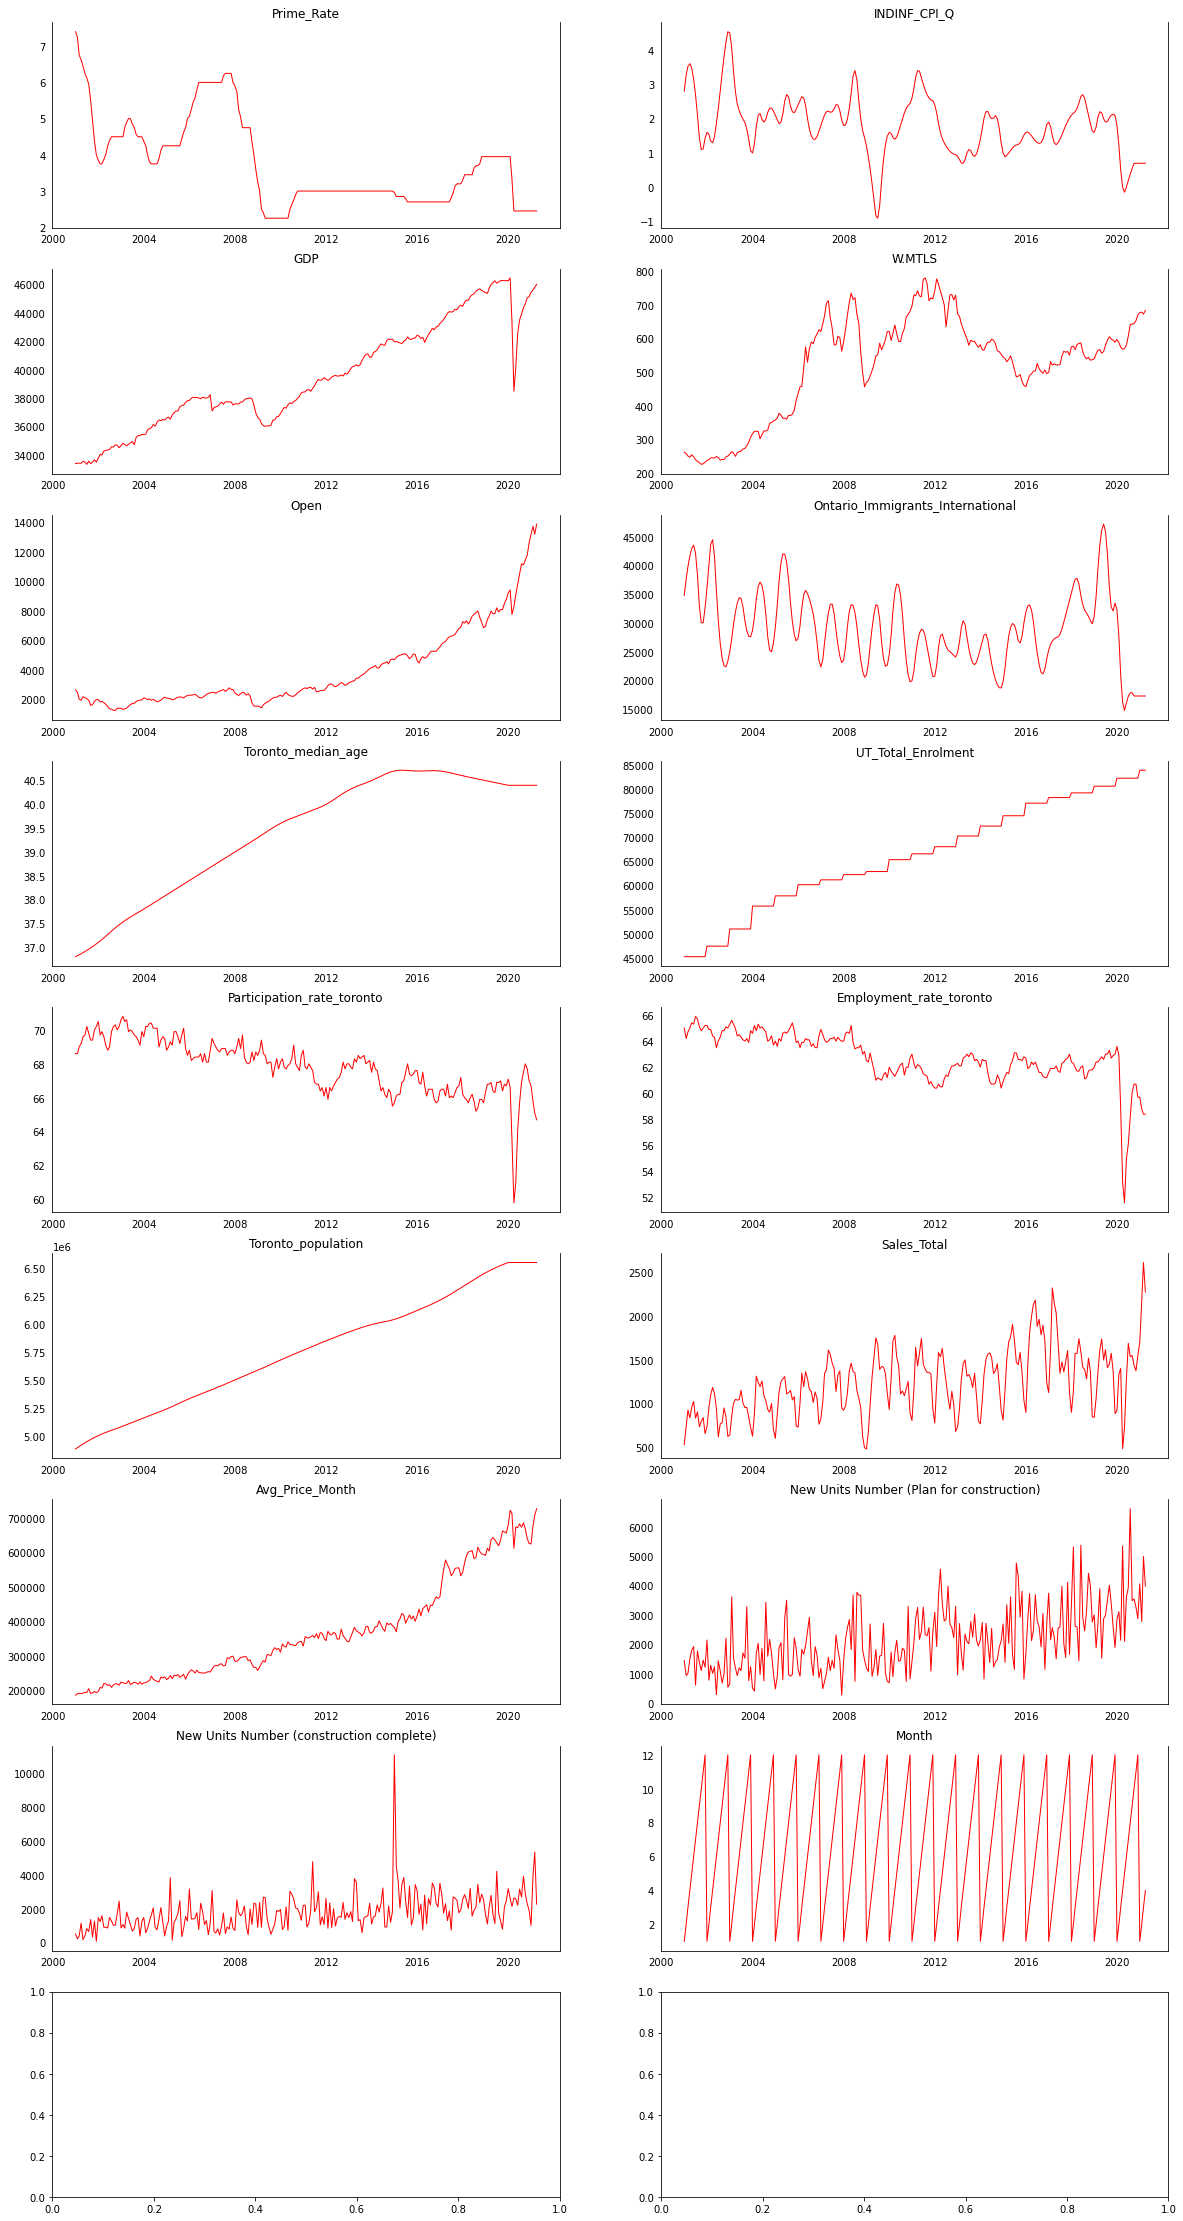

In [251]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [253]:
df_target = pd.DataFrame()
df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [254]:
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[ 3.0314394   1.16141195 -1.64302143 -1.72949598 -0.48435472  0.89824492
  -2.14391064 -1.92167085  0.46954691  1.19741927 -1.78398906 -1.91715057
  -0.63980796 -1.15942046 -1.5687969 ]
 [ 2.90650162  1.71450323 -1.63742363 -1.75575093 -0.54628105  1.33824652
  -2.12745465 -1.92167085  0.46954691  0.78210967 -1.75947619 -1.36976402
  -1.10280166 -1.41565529 -1.28011934]
 [ 2.49004236  2.00473664 -1.63565244 -1.80551314 -0.72272853  1.66651219
  -2.11189626 -1.92167085  0.72162489  1.04167817 -1.73794623 -0.85189341
  -1.04028392 -1.27129764 -0.99144178]
 [ 2.38592754  2.09430506 -1.63813987 -1.82686365 -0.74862531  1.95338457
  -2.09390151 -1.92167085  0.84766388  1.19741927 -1.7147856  -1.09070421
  -0.59812946 -0.58198985 -0.70276422]
 [ 2.2401668   1.94909603 -1.60083781 -1.77877409 -0.65615956  2.15439652
  -2.07571743 -1.92167085  1.09974187  1.40507407 -1.69304857 -0.76334559
  -0.31997082 -1.46257153 -0.41408666]]


In [255]:
pca = PCA(n_components=8)

In [256]:
df_pca = pca.fit_transform(df_scaled)

In [257]:
df_pca_fit = pd.DataFrame(data = df_pca)
df_pca_fit.head()

,0,1,2,3,4,5,6,7
0,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713
1,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008
2,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727
3,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201
4,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568


In [258]:
pca.explained_variance_ratio_

array([0.53316507, 0.09663677, 0.07166296, 0.05725705, 0.0547087 ,
       0.04624262, 0.03973268, 0.03041986])

In [259]:
df_target["Avg_Price_Month"]

Date
2001-01-01    185757.6686
2001-02-01    189990.7036
2001-03-01    191476.2205
2001-04-01    189802.6914
2001-05-01    191658.3372
                 ...     
2020-12-01    625828.1154
2021-01-01    624885.6230
2021-02-01    676837.4998
2021-03-01    707835.1083
2021-04-01    727137.3430
Name: Avg_Price_Month, Length: 244, dtype: float64

In [260]:
df_pca_fit.index = df_target.index

In [261]:
df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [262]:
df_pca_fit

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,185757.6686
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,189990.7036
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,191476.2205
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,189802.6914
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,191658.3372
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,625828.1154
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,624885.6230
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,676837.4998


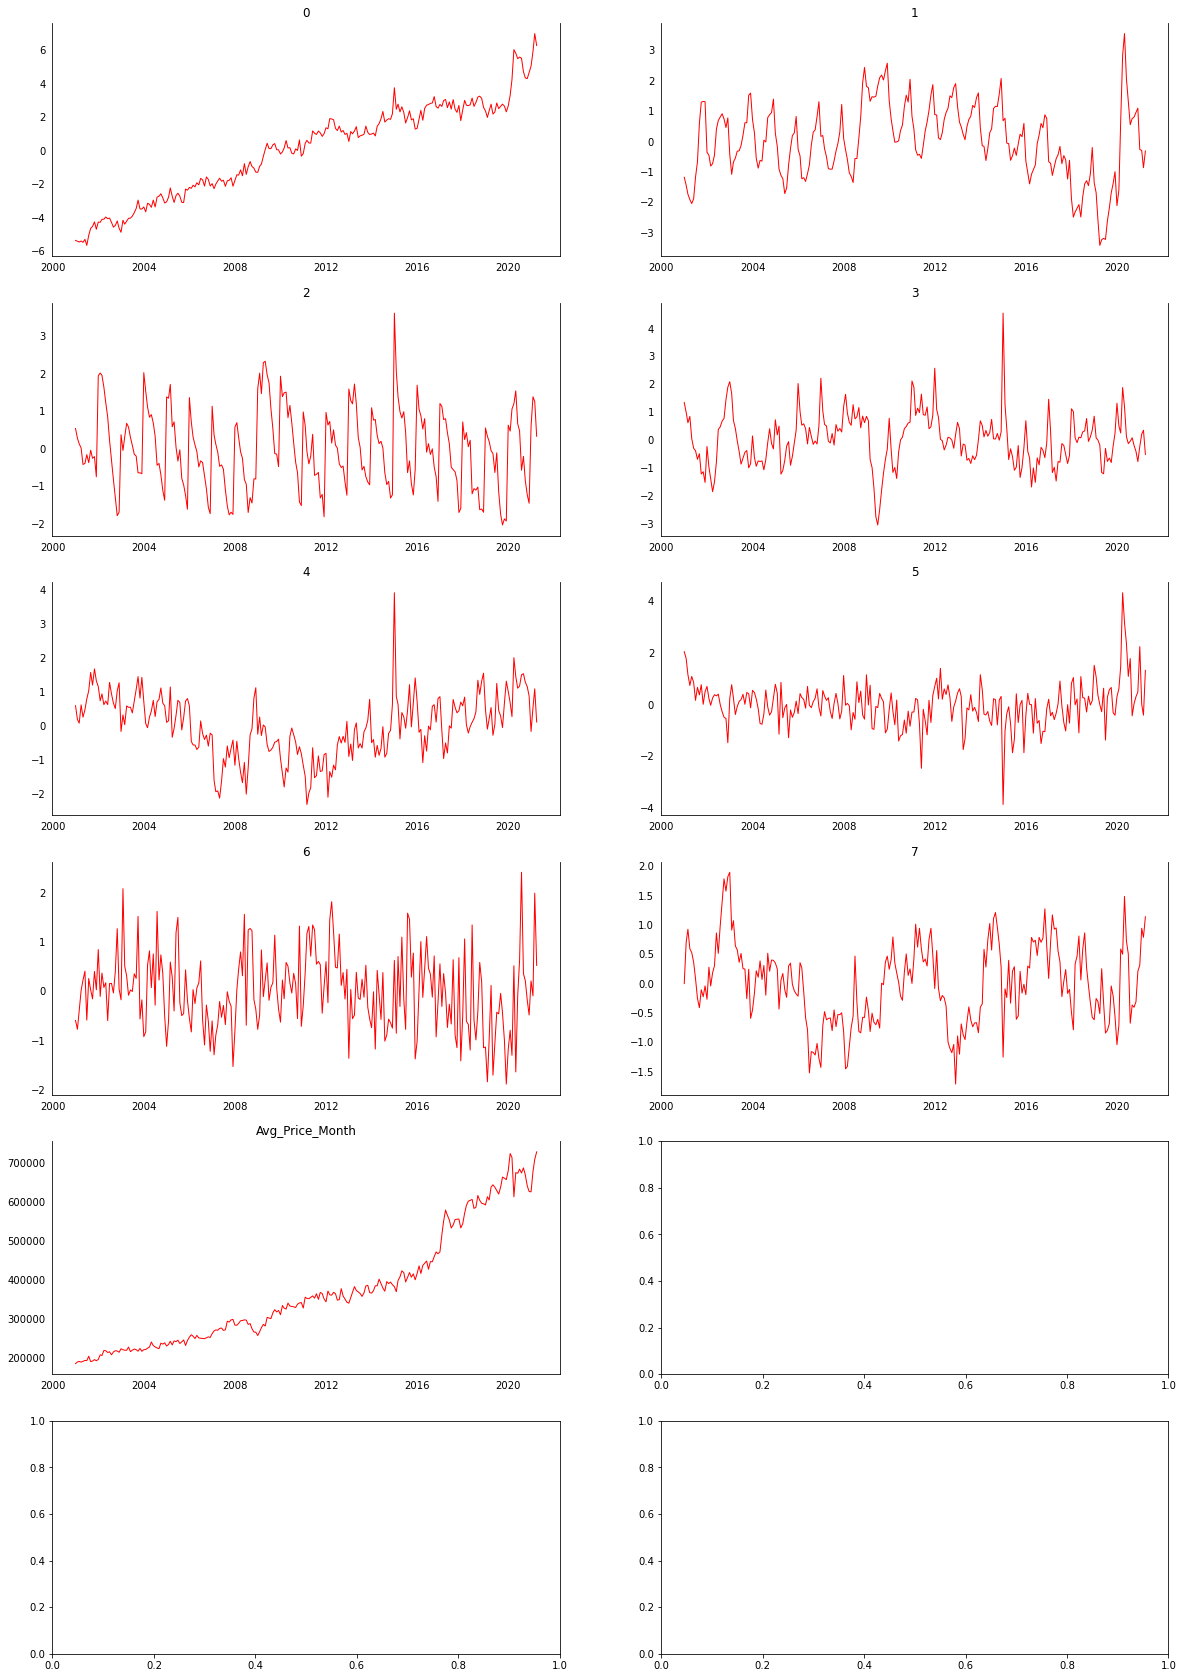

In [263]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df_pca_fit[df_pca_fit.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df_pca_fit.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [264]:
df = df_pca_fit.copy()

In [265]:
df["Avg_Price_Month"] = df["Avg_Price_Month"]/100000

In [266]:
df

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,1.857577
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,1.899907
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,1.914762
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,1.898027
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,1.916583
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,6.258281
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,6.248856
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,6.768375


In [267]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,Avg_Price_Month_x
0_y,1.0000,0.0000,0.0011,0.0138,0.0000,0.0028,0.0000,0.0000,0.0030
1_y,0.0000,1.0000,0.0000,0.0000,0.0119,0.1540,0.0000,0.0014,0.0002
2_y,0.0005,0.0000,1.0000,0.0000,0.0000,0.0000,0.0150,0.0059,0.0107
3_y,0.0000,0.0000,0.0000,1.0000,0.0112,0.0100,0.0009,0.0309,0.0097
4_y,0.0681,0.0000,0.0000,0.0000,1.0000,0.0000,0.0326,0.0001,0.0416
5_y,0.1294,0.0000,0.0014,0.0040,0.0006,1.0000,0.0001,0.4488,0.0001
6_y,0.1194,0.0000,0.0001,0.0035,0.0001,0.2918,1.0000,0.0000,0.0497
7_y,0.0000,0.0271,0.0035,0.0000,0.0021,0.1740,0.0000,1.0000,0.1447
Avg_Price_Month_y,0.0120,0.0000,0.0000,0.0020,0.0583,0.0006,0.0243,0.3021,1.0000


In [268]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
0      ::  328.57    > 179.5199  =>   True
1      ::  218.91    > 143.6691  =>   True
2      ::  157.37    > 111.7797  =>   True
3      ::  106.05    > 83.9383   =>   True
4      ::  73.24     > 60.0627   =>   True
5      ::  44.0      > 40.1749   =>   True
6      ::  19.83     > 24.2761   =>   False
7      ::  4.88      > 12.3212   =>   False
Avg_Price_Month ::  0.06      > 4.1296    =>   False


In [269]:
nobs = 23+13
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(208, 9)
(36, 9)


In [270]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [271]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4242
 No. Lags Chosen       = 2
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.5706. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6884
 No. Lags Chosen       = 15
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.4371. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-

In [272]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [273]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.6742
 No. Lags Chosen       = 1
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.396
 No. Lags Chosen       = 14
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test

In [274]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [275]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3616
 No. Lags Chosen       = 15
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6956
 No. Lags Chosen       = 15
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test S

In [276]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-03-01,-0.000960,-0.034133,0.107182,-0.022306,0.299873,-0.355718,0.561897,-0.482003,-0.027475
2001-04-01,0.107518,0.116623,0.039153,0.600227,0.641754,0.203257,0.020697,-0.554245,-0.031590
2001-05-01,-0.136391,0.046170,-0.328325,-1.014539,-0.896405,0.768105,-0.194817,0.268893,0.035292
2001-06-01,0.255053,0.289764,0.467168,0.433563,0.576950,-0.575395,-0.028116,-0.102090,0.003864
2001-07-01,-0.537915,0.549014,0.206041,0.266817,0.102109,-0.470565,-1.178056,-0.113820,-0.026289
...,...,...,...,...,...,...,...,...,...
2017-12-01,-1.321964,1.245780,0.957724,0.608127,0.199580,-1.732621,-3.933988,0.476188,-0.230871
2018-01-01,1.540014,-1.868118,2.197228,1.383978,-0.368282,2.255724,3.007618,-0.456597,0.332738
2018-02-01,-0.053408,0.643757,-2.774718,-1.772393,0.368316,-1.318396,0.669519,0.087053,0.164180


In [277]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -19.05797902558919
BIC :  -17.599096595723548
FPE :  5.2908782714832264e-09
HQIC:  -18.467896063619797 

Lag Order = 2
AIC :  -20.585376235664977
BIC :  -17.804010946707326
FPE :  1.1534558585342943e-09
HQIC:  -19.460263535426254 

Lag Order = 3
AIC :  -21.11728677841076
BIC :  -17.00434142511751
FPE :  6.851661380901289e-10
HQIC:  -19.453353332798095 

Lag Order = 4
AIC :  -21.418016717183292
BIC :  -15.964288285328829
FPE :  5.183431102849085e-10
HQIC:  -19.21142832619693 

Lag Order = 5
AIC :  -21.69528253066472
BIC :  -14.891460481229608
FPE :  4.0748518556068754e-10
HQIC:  -18.942161135396304 

Lag Order = 6
AIC :  -21.923965530560473
BIC :  -13.760630048354082
FPE :  3.4303202495002793e-10
HQIC:  -18.620388534460247 

Lag Order = 7
AIC :  -22.259322675936033
BIC :  -12.726942881758609
FPE :  2.6631158622167816e-10
HQIC:  -18.401322253078483 



C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [278]:
x = model.select_order(maxlags=17)
x.summary()

,AIC,BIC,FPE,HQIC
0,-16.07,-15.91,1.054e-07,-16.00
1,-19.03,-17.49,5.423e-09,-18.41
2,-20.63,-17.70*,1.101e-09,-19.45
3,-21.19,-16.87,6.373e-10,-19.44
4,-21.49,-15.78,4.852e-10,-19.18
5,-21.84,-14.74,3.587e-10,-18.96
6,-22.05,-13.56,3.104e-10,-18.61
7,-22.48,-12.60,2.214e-10,-18.48
8,-22.55,-11.28,2.365e-10,-17.98
9,-22.82,-10.16,2.133e-10,-17.69


In [279]:
# 14
# 15
# 17
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Jun, 2021
Time:                     23:44:24
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -11.4992
Nobs:                     191.000    HQIC:                  -23.8991
Log likelihood:           1873.41    FPE:                2.26935e-13
AIC:                     -32.3410    Det(Omega_mle):     1.79586e-15
--------------------------------------------------------------------
Results for equation 0
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.006180         0.022252            0.278           0.781
L1.0                       -0.607415         0.600790           -1.011           0.312
L1.1                        1.662860    

In [280]:
def adjust(val, length= 6): return str(val).ljust(length)

In [281]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

0      : 1.95
1      : 1.93
2      : 1.88
3      : 1.92
4      : 1.97
5      : 1.88
6      : 2.01
7      : 1.93
Avg_Price_Month : 1.98


In [282]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-03-01,-0.000960,-0.034133,0.107182,-0.022306,0.299873,-0.355718,0.561897,-0.482003,-0.027475
2001-04-01,0.107518,0.116623,0.039153,0.600227,0.641754,0.203257,0.020697,-0.554245,-0.031590
2001-05-01,-0.136391,0.046170,-0.328325,-1.014539,-0.896405,0.768105,-0.194817,0.268893,0.035292
2001-06-01,0.255053,0.289764,0.467168,0.433563,0.576950,-0.575395,-0.028116,-0.102090,0.003864
2001-07-01,-0.537915,0.549014,0.206041,0.266817,0.102109,-0.470565,-1.178056,-0.113820,-0.026289
...,...,...,...,...,...,...,...,...,...
2017-12-01,-1.321964,1.245780,0.957724,0.608127,0.199580,-1.732621,-3.933988,0.476188,-0.230871
2018-01-01,1.540014,-1.868118,2.197228,1.383978,-0.368282,2.255724,3.007618,-0.456597,0.332738
2018-02-01,-0.053408,0.643757,-2.774718,-1.772393,0.368316,-1.318396,0.669519,0.087053,0.164180


In [283]:
df_train

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,1.857577
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,1.899907
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,1.914762
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,1.898027
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,1.916583
...,...,...,...,...,...,...,...,...,...
2017-12-01,1.790855,-0.622832,-1.594396,-0.561867,0.696772,-0.726072,-1.417342,-0.101546,5.327003
2018-01-01,2.423539,-1.876049,0.710073,1.111522,0.585504,0.815899,-0.511078,-0.489544,5.432786
2018-02-01,3.002815,-2.485508,0.239823,1.012517,0.842552,1.039475,1.064706,-0.790489,5.702751


In [284]:
df_test

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2018-05-01,2.738568,-2.074506,0.221149,0.095403,-0.020557,-1.102733,-1.197401,0.809518,6.030819
2018-06-01,3.138860,-2.483687,-1.205033,0.071062,0.103532,1.077398,1.350296,0.060611,6.055297
2018-07-01,2.639481,-1.820370,-1.066421,0.283540,0.209627,0.260409,-0.585254,0.583180,5.825474
2018-08-01,2.873640,-1.399239,-1.106236,0.318385,0.413176,0.241725,-0.990257,0.861896,5.853556
2018-09-01,3.198315,-1.291522,-1.025217,0.763033,1.336325,-0.296226,-0.411040,0.269481,6.155817
2018-10-01,3.251895,-1.452157,-1.627879,-0.058746,0.920453,0.318141,0.586593,-0.036806,6.031533
2018-11-01,3.120128,-1.060300,-1.609371,0.105229,1.310961,-0.025856,0.189818,-0.330436,5.956774
2018-12-01,2.584724,-0.201685,-1.696198,0.348966,1.543395,0.142501,-1.150742,-0.578259,5.943815
2019-01-01,2.369748,-1.354928,0.549491,0.846655,0.472766,1.512764,-1.135975,-0.617432,5.914439


In [285]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

15


array([[-0.34585913,  1.35983653, -2.68505584, -2.74379589, -1.06468708,
        -1.00846527, -1.64548307,  1.16848874,  0.39197159],
       [ 0.4707415 , -0.34027631, -0.26839142, -0.28861411,  0.20390853,
         0.77682307,  1.5340997 , -0.15470915, -0.09139441],
       [-0.28200233,  0.68415834,  0.36922338,  1.65483215,  1.26451702,
        -0.41653423, -1.06569393, -0.7073749 , -0.06895162],
       [-0.55778458, -0.027615  , -0.39572645, -0.68975063, -0.75397378,
         0.52302037, -0.30057995,  0.26437042, -0.41452304],
       [ 0.83320716, -0.12772067,  0.07607081,  1.19701007,  1.09128083,
         0.12783152,  1.17021101, -0.41967079,  0.01343689],
       [-0.77277522,  0.13981887, -0.31812364, -0.7263603 , -0.86435233,
         0.51098137, -0.87277703,  0.21986275, -0.08048715],
       [ 0.99868072, -0.83774985,  0.54989976,  0.69674897,  0.9103991 ,
        -1.85085246,  1.71011552, -0.41617149,  0.27843921],
       [-1.14516529,  0.83048756,  0.00778907, -0.73777459, -1

In [286]:
col_list = list()
for col in df.columns:
    col_list.append(str(col))
df.columns = col_list 

In [287]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d
Date,,,,,,,,,
2018-05-01,0.358229,0.229914,-0.288795,0.720375,0.224966,0.562057,0.654098,-0.308412,-0.296955
2018-06-01,0.299577,-0.311904,0.304969,1.545619,1.811591,-1.161632,1.476648,-1.130926,-0.058904
2018-07-01,-1.826645,1.003561,-0.505472,-2.773062,-3.152433,1.155453,-3.843975,1.739531,0.185011
2018-08-01,1.817525,-0.958712,0.650427,1.499091,2.197045,-1.030497,3.047778,-0.981464,0.016079
2018-09-01,-1.060522,0.275372,-0.191015,-1.653927,-1.664433,0.619528,-2.432474,0.849945,0.136963
2018-10-01,1.178169,-0.710393,0.652001,1.418168,1.903157,-1.229561,2.201640,-0.836184,0.061749
2018-11-01,-1.025883,0.712408,-0.111890,-1.128163,-1.725203,0.476052,-3.326882,1.202811,-0.071421
2018-12-01,0.132275,-0.939608,-1.129135,0.466316,1.310023,2.075669,4.096881,-2.060176,-0.314464
2019-01-01,0.372249,-0.872731,3.971994,1.683208,-0.148611,-1.716147,-1.166508,0.757318,0.334019


In [288]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [289]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d,0_1d,...,4_1d,4_forecast,5_1d,5_forecast,6_1d,6_forecast,7_1d,7_forecast,Avg_Price_Month_1d,Avg_Price_Month_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,0.358229,0.229914,-0.288795,0.720375,0.224966,0.562057,0.654098,-0.308412,-0.296955,0.336939,...,-0.019913,-0.232041,0.788815,0.998910,0.585952,-0.091729,-0.174766,0.289423,-0.186686,5.825423
2018-06-01,0.299577,-0.311904,0.304969,1.545619,1.811591,-1.161632,1.476648,-1.130926,-0.058904,0.636516,...,1.791677,1.559636,-0.372816,0.626094,2.062600,1.970871,-1.305692,-1.016268,-0.245590,5.579833
2018-07-01,-1.826645,1.003561,-0.505472,-2.773062,-3.152433,1.155453,-3.843975,1.739531,0.185011,-1.190129,...,-1.360756,0.198880,0.782637,1.408731,-1.781375,0.189496,0.433839,-0.582429,-0.060579,5.519254
2018-08-01,1.817525,-0.958712,0.650427,1.499091,2.197045,-1.030497,3.047778,-0.981464,0.016079,0.627396,...,0.836289,1.035169,-0.247860,1.160870,1.266403,1.455899,-0.547625,-1.130054,-0.044500,5.474754
2018-09-01,-1.060522,0.275372,-0.191015,-1.653927,-1.664433,0.619528,-2.432474,0.849945,0.136963,-0.433126,...,-0.828145,0.207024,0.371668,1.532538,-1.166071,0.289828,0.302320,-0.827734,0.092463,5.567218
2018-10-01,1.178169,-0.710393,0.652001,1.418168,1.903157,-1.229561,2.201640,-0.836184,0.061749,0.745043,...,1.075012,1.282036,-0.857893,0.674645,1.035569,1.325397,-0.533865,-1.361599,0.154213,5.721431
2018-11-01,-1.025883,0.712408,-0.111890,-1.128163,-1.725203,0.476052,-3.326882,1.202811,-0.071421,-0.280840,...,-0.650191,0.631845,-0.381841,0.292804,-2.291314,-0.965917,0.668947,-0.692652,0.082792,5.804222
2018-12-01,0.132275,-0.939608,-1.129135,0.466316,1.310023,2.075669,4.096881,-2.060176,-0.314464,-0.148564,...,0.659831,1.291676,1.693828,1.986631,1.805567,0.839650,-1.391229,-2.083881,-0.231672,5.572551
2019-01-01,0.372249,-0.872731,3.971994,1.683208,-0.148611,-1.716147,-1.166508,0.757318,0.334019,0.223685,...,0.511220,1.802897,-0.022319,1.964312,0.639059,1.478709,-0.633911,-2.717792,0.102347,5.674898


In [290]:
col_list = list()
for col in df_test.columns:
    col_list.append(str(col))
df_test.columns = col_list 

In [291]:
col,ax

('Avg_Price_Month', <AxesSubplot:>)

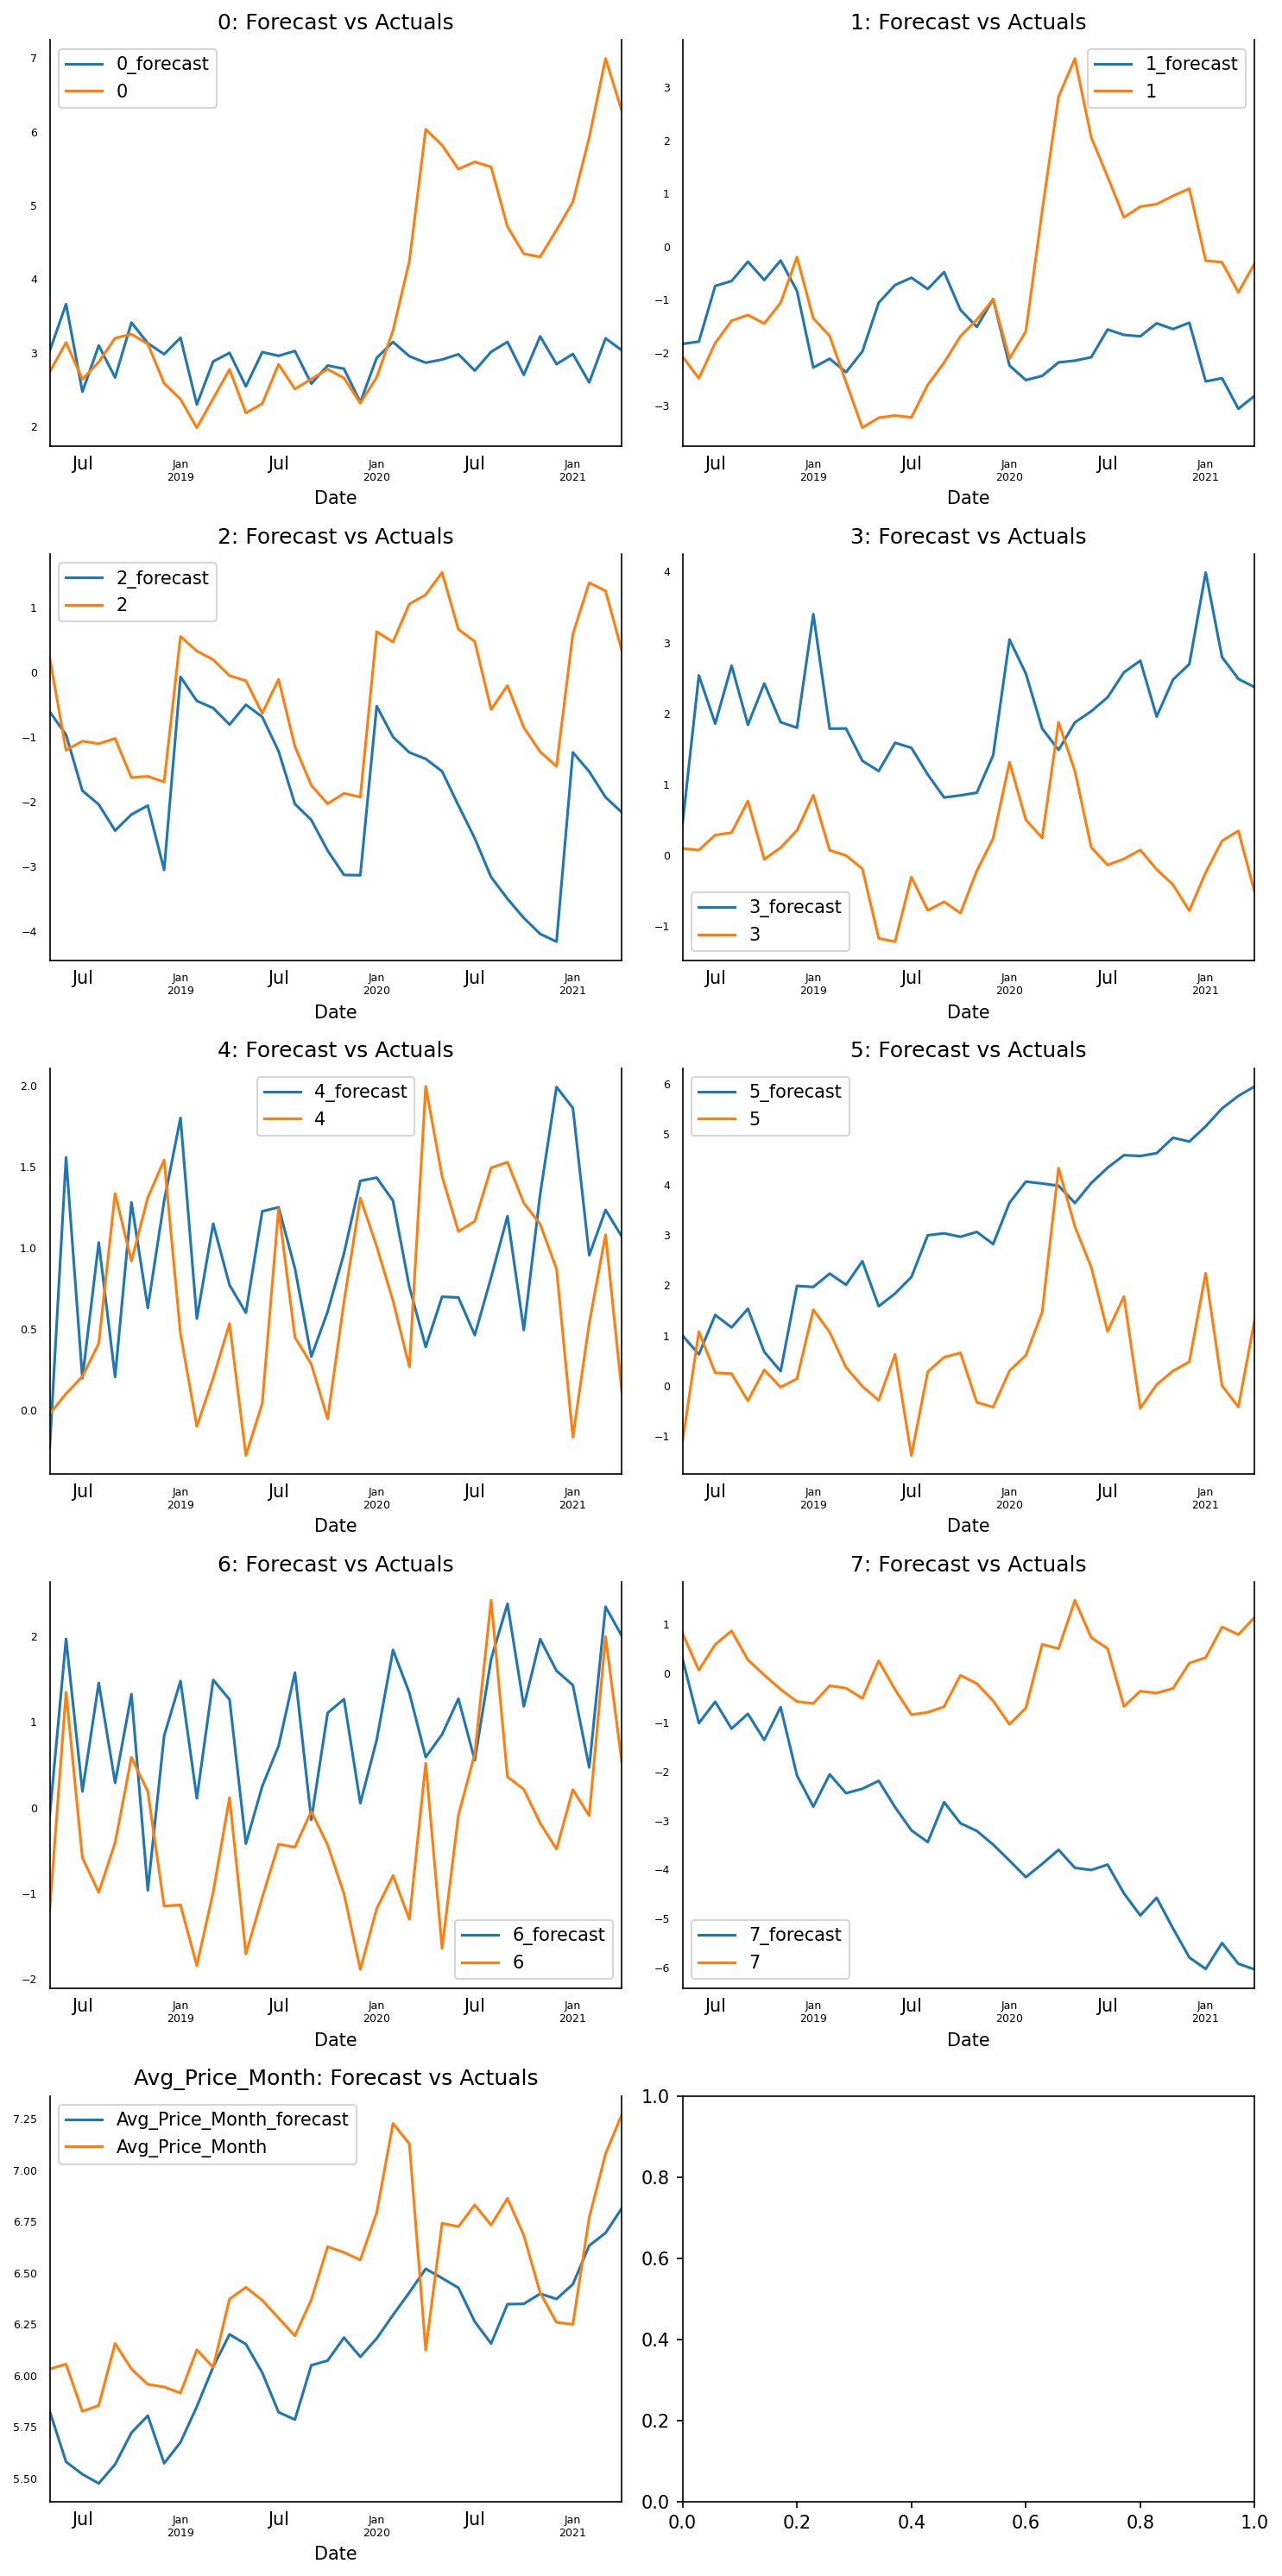

In [292]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [293]:
df_results['Avg_Price_Month_forecast']

Date
2018-05-01    5.825423
2018-06-01    5.579833
2018-07-01    5.519254
2018-08-01    5.474754
2018-09-01    5.567218
2018-10-01    5.721431
2018-11-01    5.804222
2018-12-01    5.572551
2019-01-01    5.674898
2019-02-01    5.848476
2019-03-01    6.041842
2019-04-01    6.199919
2019-05-01    6.152331
2019-06-01    6.013879
2019-07-01    5.820963
2019-08-01    5.785218
2019-09-01    6.049649
2019-10-01    6.072171
2019-11-01    6.184324
2019-12-01    6.090326
2020-01-01    6.180117
2020-02-01    6.294458
2020-03-01    6.404159
2020-04-01    6.519019
2020-05-01    6.473576
2020-06-01    6.426547
2020-07-01    6.261531
2020-08-01    6.155284
2020-09-01    6.346891
2020-10-01    6.348581
2020-11-01    6.397784
2020-12-01    6.372111
2021-01-01    6.444089
2021-02-01    6.631792
2021-03-01    6.693964
2021-04-01    6.814482
Name: Avg_Price_Month_forecast, dtype: float64

In [294]:
df_test.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', 'Avg_Price_Month'], dtype='object')

In [295]:
df_final = df_results[['Avg_Price_Month_forecast']].join(df_test[["Avg_Price_Month"]])

In [296]:
df_final

,Avg_Price_Month_forecast,Avg_Price_Month
Date,,
2018-05-01,5.825423,6.030819
2018-06-01,5.579833,6.055297
2018-07-01,5.519254,5.825474
2018-08-01,5.474754,5.853556
2018-09-01,5.567218,6.155817
2018-10-01,5.721431,6.031533
2018-11-01,5.804222,5.956774
2018-12-01,5.572551,5.943815
2019-01-01,5.674898,5.914439


In [297]:
df_test["Avg_Price_Month"]

Date
2018-05-01    6.030819
2018-06-01    6.055297
2018-07-01    5.825474
2018-08-01    5.853556
2018-09-01    6.155817
2018-10-01    6.031533
2018-11-01    5.956774
2018-12-01    5.943815
2019-01-01    5.914439
2019-02-01    6.124885
2019-03-01    6.039691
2019-04-01    6.371804
2019-05-01    6.428907
2019-06-01    6.366065
2019-07-01    6.279269
2019-08-01    6.193065
2019-09-01    6.368175
2019-10-01    6.626311
2019-11-01    6.598553
2019-12-01    6.562325
2020-01-01    6.791822
2020-02-01    7.226747
2020-03-01    7.127458
2020-04-01    6.123005
2020-05-01    6.740281
2020-06-01    6.724651
2020-07-01    6.829996
2020-08-01    6.731739
2020-09-01    6.861914
2020-10-01    6.681606
2020-11-01    6.402078
2020-12-01    6.258281
2021-01-01    6.248856
2021-02-01    6.768375
2021-03-01    7.078351
2021-04-01    7.271373
Name: Avg_Price_Month, dtype: float64